In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
import pandas as pd

url = "/content/intents1.json"  # Replace with the actual URL
df = pd.read_json(url)
df


,intents
0,"{'tag': 'greeting', 'patterns': ['Hi', 'Hello'..."
1,"{'tag': 'farewell', 'patterns': ['Goodbye', 'B..."
2,"{'tag': 'creator', 'patterns': ['Who created y..."
3,"{'tag': 'identity', 'patterns': ['What is your..."
4,"{'tag': 'hours', 'patterns': ['What are the co..."
...,...
70,"{'tag': 'employer_recruitment', 'patterns': ['..."
71,"{'tag': 'summer_jobs', 'patterns': ['How easy ..."
72,"{'tag': 'notable_graduates', 'patterns': ['Who..."
73,"{'tag': 'alumni_association', 'patterns': ['Ho..."


In [ ]:
dic = {"tag": [], "patterns": [], "responses": []}
for i in range(len(df)):
    # Access the 'intents' column and then the dictionary within
    intent_data = df['intents'].iloc[i]
    ptrns = intent_data['patterns']
    rspns = intent_data['responses']
    tag = intent_data['tag']
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)

df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,greeting,Hi,"[Hello!, Good to see you!, Hi there, how can I..."
1,greeting,Hello,"[Hello!, Good to see you!, Hi there, how can I..."
2,greeting,Hey,"[Hello!, Good to see you!, Hi there, how can I..."
3,greeting,Good day,"[Hello!, Good to see you!, Hi there, how can I..."
4,greeting,How are you?,"[Hello!, Good to see you!, Hi there, how can I..."
...,...,...,...
217,alumni_association,Does the college have an active alumni network?,[Many colleges have active alumni associations...
218,alumni_association,Are there opportunities to connect with alumni?,[Many colleges have active alumni associations...
219,hands-on_experiences,What kinds of hands-on or practical experience...,[Colleges often provide opportunities for hand...
220,hands-on_experiences,Are there opportunities for practical learning?,[Colleges often provide opportunities for hand...


In [ ]:
df['tag'].unique()

array(['greeting', 'farewell', 'creator', 'identity', 'hours', 'contact',
       'courses', 'fees', 'location', 'hostel', 'events', 'admission',
       'library', 'facilities', 'placement', 'school_choice', 'happiness',
       'strengths', 'complaints', 'improvements', 'accessibility',
       'academics_majors', 'academics_reputation', 'favorite_class',
       'professors_teachers', 'professors_office_hours',
       'professors_vs_TAs', 'first_choice_classes', 'class_format',
       'reading_writing', 'collaborative_work', 'academic_advising',
       'tutoring_programs', 'class_size', 'independent_study',
       'professor_research', 'study_abroad', 'first_year_experience',
       'typical_day', 'study_time', 'non_class_activities',
       'weekend_activities', 'social_scene', 'hometown_activities',
       'food', 'on_campus_housing', 'dorm_quality', 'popular_clubs',
       'fraternities_sororities', 'favorite_place_on_campus',
       'study_locations', 'campus_facilities', 'computer_l

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df['patterns'])
tokenizer.get_config()

{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 222,
 'word_counts': '{"hi": 1, "hello": 1, "hey": 1, "good": 4, "day": 3, "how": 36, "are": 74, "you": 38, "goodbye": 1, "bye": 1, "see": 1, "later": 2, "talk": 1, "to": 20, "who": 6, "created": 1, "is": 39, "your": 38, "developer": 1, "made": 2, "what": 42, "name": 1, "should": 2, "i": 8, "call": 1, "the": 86, "college": 45, "timings": 2, "when": 3, "open": 1, "hours": 2, "of": 29, "operation": 1, "can": 18, "contact": 2, "telephone": 1, "number": 2, "get": 7, "courses": 3, "offered": 1, "in": 25, "tell": 6, "me": 6, "about": 8, "available": 7, "branches": 1, "much": 3, "fee": 1, "fees": 3, "hostel": 4, "where": 5, "located": 3, "address": 1, "reach": 2, "does": 13, "provide": 3, "facilities": 7, "events": 5, "organized": 1, "there": 41, "any": 6, "upcoming": 1, "admission": 3, "process": 1, "take": 2, "criteria": 1, "have

In [ ]:
vacab_size = len(tokenizer.word_index)
print('number of unique words = ', vacab_size)

number of unique words =  412


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

ptrn2seq = tokenizer.texts_to_sequences(df['patterns'])
X = pad_sequences(ptrn2seq, padding='post')
print('X shape = ', X.shape)

lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(df['tag'])
print('y shape = ', y.shape)
print('num of classes = ', len(np.unique(y)))

X shape =  (222, 17)
y shape =  (222,)
num of classes =  75


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 17, 100)             │          41,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 17, 32)              │          17,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization                  │ (None, 17, 32)              │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 17, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_1                │ (None, 17, 32)              │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_2                │ (None, 32)                  │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_3                │ (None, 128)                 │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_4                │ (None, 128)                 │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 75)                  │           9,675 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 106,079 (414.37 KB)

 Trainable params: 106,079 (414.37 KB)

 Non-trainable params: 0 (0.00 B)

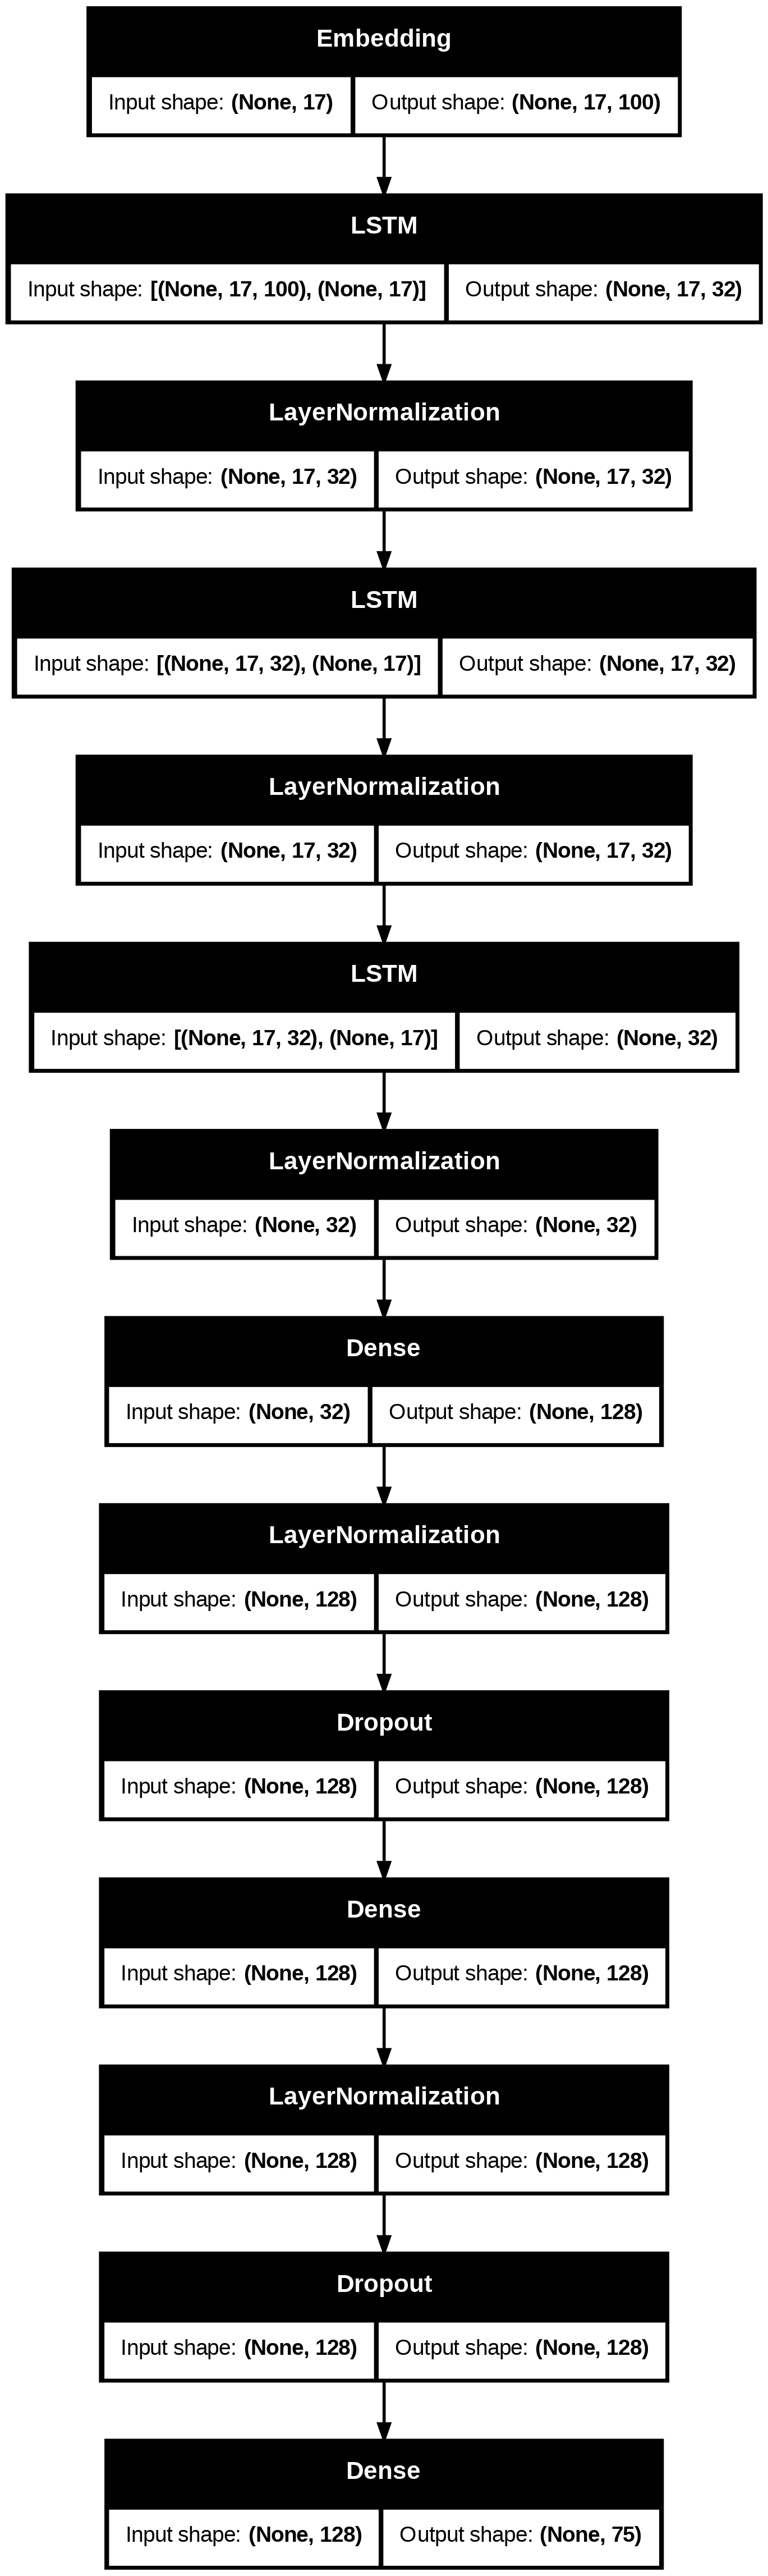

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Input(shape=(X.shape[1],)))
# Add the Embedding layer with the correct input_dim and output_dim
model.add(Embedding(input_dim=vacab_size + 1, output_dim=100, mask_zero=True))
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32))
model.add(LayerNormalization())
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation="softmax"))
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)

In [ ]:
model_history = model.fit(x=X,
                          y=y,
                          batch_size=10,
                          callbacks=[tensorflow.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)],
                          epochs=50)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.0118 - loss: 5.0852
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.0398 - loss: 4.6518
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.0965 - loss: 3.7840
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.1975 - loss: 3.2452
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3187 - loss: 2.8230
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.3876 - loss: 2.5049
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.5642 - loss: 2.0459
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6477 - loss: 1.7245
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6944 - loss: 1.5191
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8221 - loss: 1.2551
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8443 - loss: 1.0374
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy

In [ ]:
import re
import random

def generate_answer(pattern):
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', pattern)
    txt = txt.lower()
    txt = txt.split()
    txt = " ".join(txt)
    text.append(txt)

    x_test = tokenizer.texts_to_sequences(text)
    # Keep x_test as a list of lists
    #x_test = np.array(x_test).squeeze()  # Remove this line
    x_test = pad_sequences(x_test, padding='post', maxlen=X.shape[1]) # Update to use x_test directly
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax()
    tag = lbl_enc.inverse_transform([y_pred])[0]
    responses = df[df['tag'] == tag]['responses'].values[0]

    print("you: {}".format(pattern))
    print("model: {}".format(random.choice(responses)))

In [ ]:
generate_answer("What's your  1 complaint about your school?")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
you: What's your  1 complaint about your school?
model: While my purpose is to provide information, some students may have different opinions. It's always good to provide feedback for continuous improvement.
